このノートブックでは、このコンペのために与えられたデータセットを調べてみましょう。

**目的：**

このデータセットには、さまざまなメルセデスの自動車を表す匿名化された変数セットが含まれています。 グラウンドトゥルースには「y」と表示され、テストに合格するまでの時間（秒）を表します。

最初に必要なモジュールをインポートしましょう。

### 下記のカーネルは各ライブラリをインポートし、データセットの一覧を表示しています。

In [1]:
import numpy as np # 線形代数
import pandas as pd # 情報処理, CSV ファイル 出入力 (例えば pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

sample_submission.csv
sample_submission.csv.zip
test.csv
test.csv.zip
train.csv
train.csv.zip



### 下記のカーネルは各データフレームtrain_df、test_dfの行と列のサイズを表示しています。

In [2]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


あ、388列で行の数が少ない。 我々は過学習しないようにする必要があります:)

上の数行を見てみましょう。

In [3]:

train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

**目標変数：**

"y"は予測する必要のある変数です。 ですから、最初にこの変数の分析をしましょう。

### 下記のカーネルはx軸に自動車数、ｙ軸にｙ値をソートし散布図を表示している。

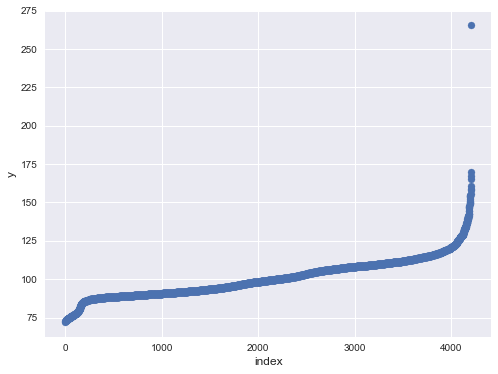

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

ある一つのデータポイントが他のデータポイントよりもはるかに上にあるようです。

さて、分布グラフをプロットしてみましょう。

### 下記のカーネルはx軸をカラム'y'に設定し、y軸は件数で、ヒストグラムを表示している。180以上のテスト時間は全て180にまとめている。

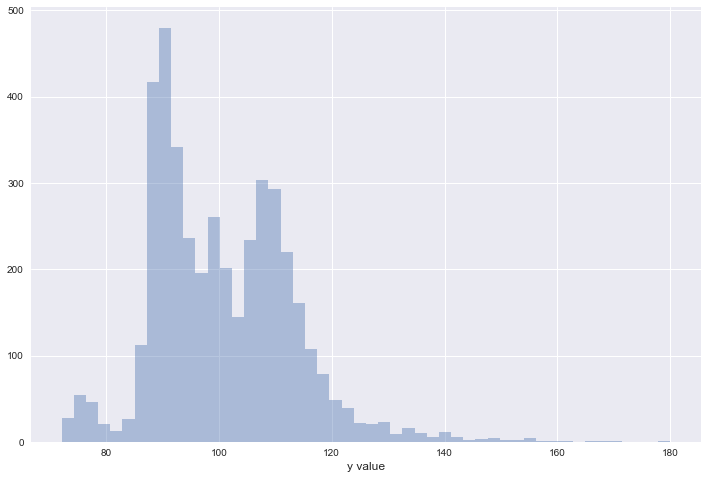

In [5]:
ulimit = 180
train_df['y'].ix[train_df['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

#### yのvalueは90がピークになっていることがわかる。

次に、データセットに存在するすべての変数のデータ型を見てみましょう。

### 下記のカーネルはデータセットのカラムのデータ型とそれぞれのデータ型をもつ変数の数を表示

In [6]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


したがって、大部分のカラムは整数で8つのカテゴリ型カラムと1つの浮動点少数のカラム（目標変数）を持ちます。

### 下記のカーネルはdtype_dfののインデックスの0から10まで、スライスして表示している。

In [7]:
dtype_df.ix[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


X0〜X8はカテゴリのカラムです。

**欠損値：**

ここで欠損値を確認しましょう。

### 下記のカーネルはデータセットの欠損値を集計しています。

In [8]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


データセットに欠損値がないのでよかった:)

**整数列分析：**

### 下記のカーネルはデータセットの各カラム'X10'以降の数値データの中身の種類で分類している

In [9]:
unique_values_dict = {}
for col in train_df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")
        

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

したがって、すべての整数列はバイナリであり、いくつかの列は一意の値0を1つしか持たないでしょう。おそらく、モデリングアクティビティでこれらの列を除外できます。

次に、データセットに存在するカテゴリの列を調べてみましょう。

### 下記のカーネルはカラム 'X0'の値をｘ軸にとり、その対応したテスト時間をｙ軸とした散布図を表示している。



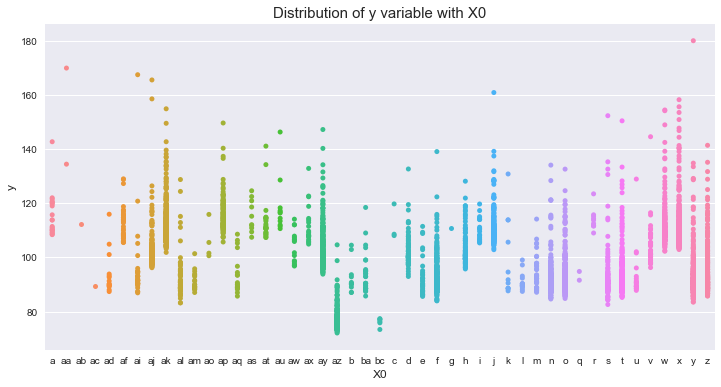

In [10]:
var_name = "X0"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

上図の散布図から相関性を見ることができない。

### 下記のカーネルはカラム 'X1'の各値をｘ軸にとり、それに対応したテスト時間をｙ軸とした散布図を表示している。

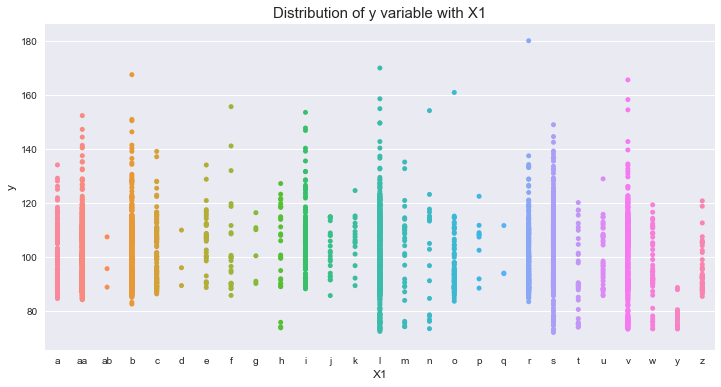

In [11]:
var_name = "X1"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

上図の散布図から相関性を見ることができない。

### 下記のカーネルはカラム 'X2'の各値をｘ軸にとり、それに対応したテスト時間をｙ軸とした箱ひげ図を表示している。

2種類のカテゴリデータを含んだ数値データのばらつきを可視化するのに適している

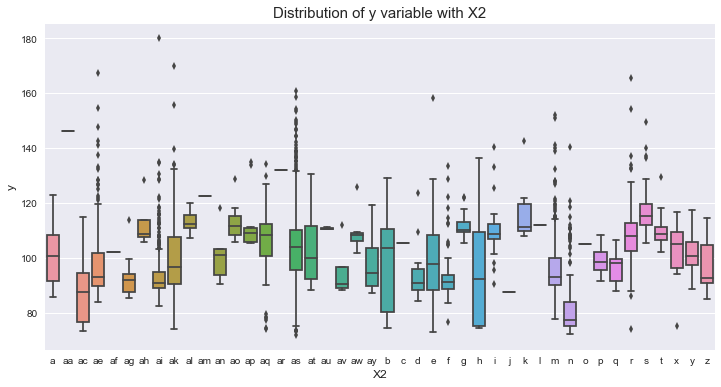

In [12]:
var_name = "X2"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

### 下記のカーネルはカラム 'X3'の各値をｘ軸にとり、それに対応したテスト時間をｙ軸としバイオリンプロットで表示している。

バイオリンプロット：  
http://seaborn.pydata.org/examples/grouped_violinplots.html

２種類のカテゴリデータを含んだ数値データの違いを可視化します．

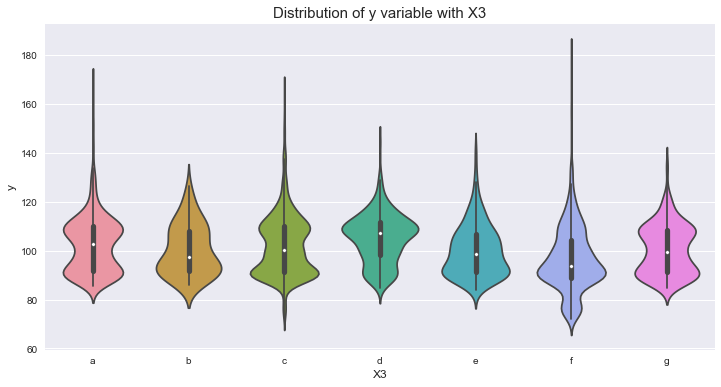

In [13]:
var_name = "X3"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

### 下記のカーネルはカラム 'X4'の各値をｘ軸にとり、それに対応したテスト時間をｙ軸としバイオリンプロットで表示している。

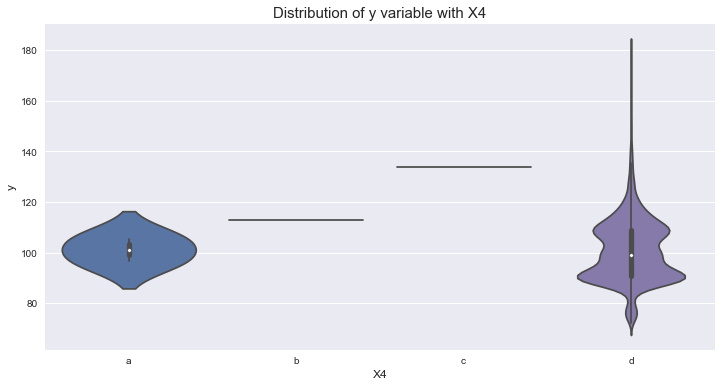

In [14]:
var_name = "X4"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

### 下記のカーネルはカラム 'X5'の各値をｘ軸にとり、それに対応したテスト時間をｙ軸とし箱ひげ図で表示している。

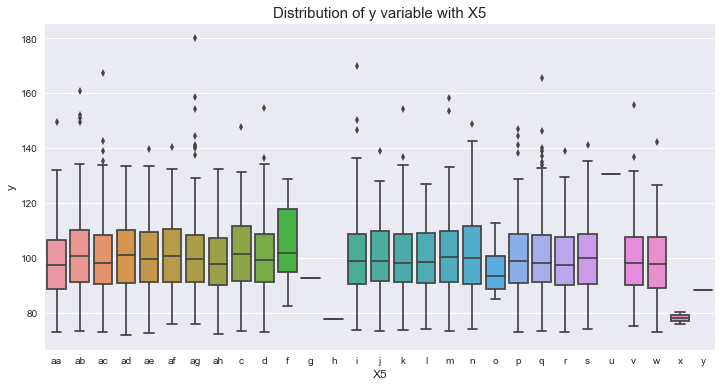

In [15]:
var_name = "X5"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

### 下記のカーネルはカラム 'X6'の各値をｘ軸にとり、それに対応したテスト時間をｙ軸とし箱ひげ図で表示している。

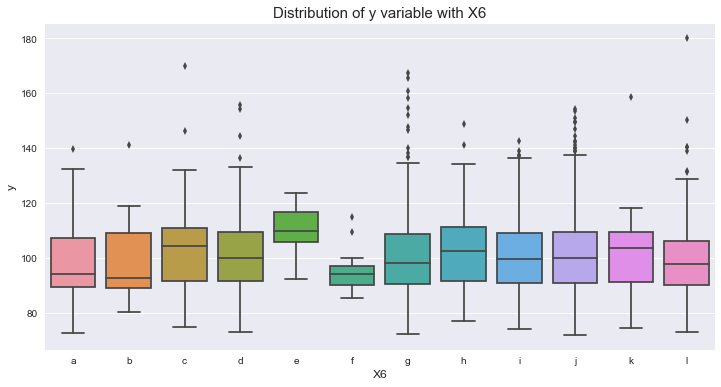

In [16]:
var_name = "X6"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

### 下記のカーネルはカラム 'X7'の各値をｘ軸にとり、それに対応したテスト時間をｙ軸とし箱ひげ図で表示している。

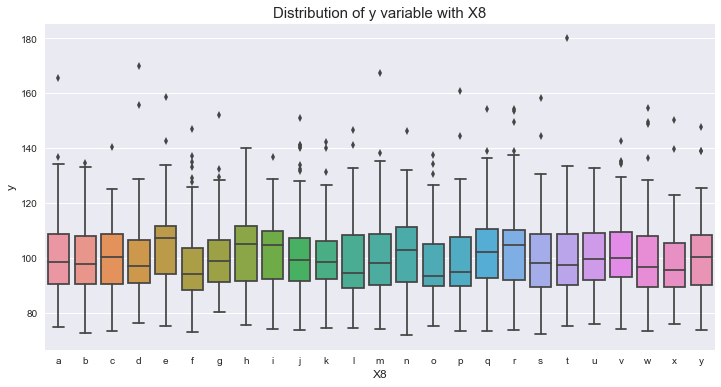

In [17]:
var_name = "X8"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

**バイナリ変数：**

これでバイナリ変数を調べることができます。 私たちがこれまで見てきたように、かなりの数があります。 これらの変数のそれぞれに0と1の数を得ることから始めましょう。

### 下記のカーネルは、カラムX10からX385まで、それぞれの値で「0」と「1」の割合を棒グラフで表示している。

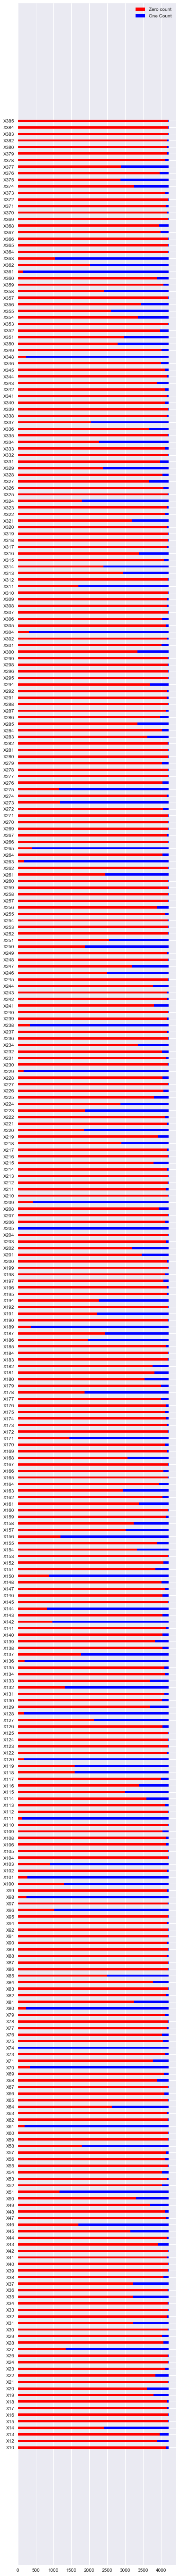

In [18]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum())
    one_count_list.append((train_df[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

さて、各バイナリ変数の平均値を調べてみましょう。

### 下記のカーネルはunique_values_dict['[0, 1]']のカラムで０と１の各値のy平均値y.meanをそれぞれリスト化し、y軸にcolumn_nameを ｘ軸にvalueを、値にｙの平均値をとってヒートマップで表示しています。
各カラムの平均を求めリストに格納


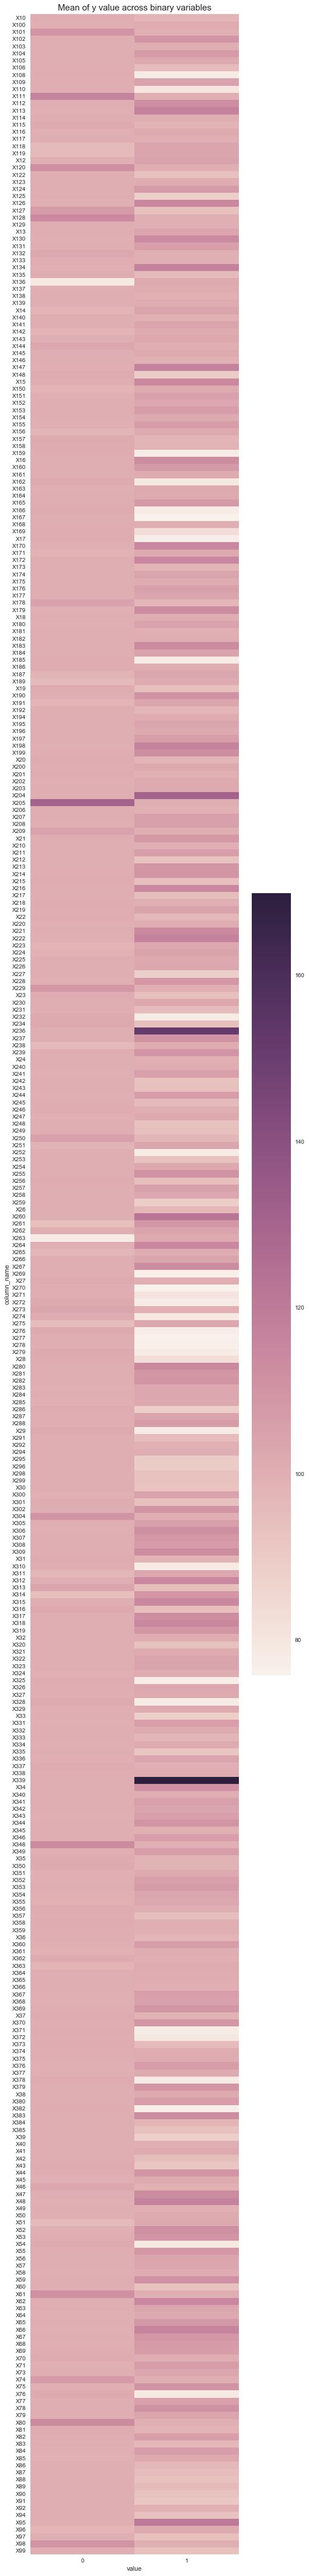

In [19]:
zero_mean_list = []
one_mean_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(train_df.ix[train_df[col]==0].y.mean())
    one_mean_list.append(train_df.ix[train_df[col]==1].y.mean())

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

上記のグラフで0と1の間に良好な色の違いを示すバイナリ変数は、両方のクラス間でカウント分布が良好であるとすれば、より予測性が高い可能性が高い（前のグラフから分かる）。 私たちは、ノートブックの後半部分で重要な変数について詳しく調べていきます。

** ID変数：**

見ていかなければならない必要があるもう一つの重要なことは、ID変数です。 これは、trainとtest（ランダムまたはIDベース）の分割がどのように行われ、IDに潜在的な予測能力があるかどうかを確認するのに役立ちます（おそらくビジネスにとってはあまり役に立ちません）

最初にID変数で 'y'変数がどのように変化するかを見てみましょう。

### 下記のカーネルはx軸をID、ｙ軸をテストタイム、データをtrainに、seaborn.regplotで2 次元のデータと線形回帰モデルの結果を重ねてプロットしています。
https://seaborn.pydata.org/generated/seaborn.regplot.html  
seaborn.regplot メソッドは、2 次元のデータと線形回帰モデルの結果を重ねてプロットします。

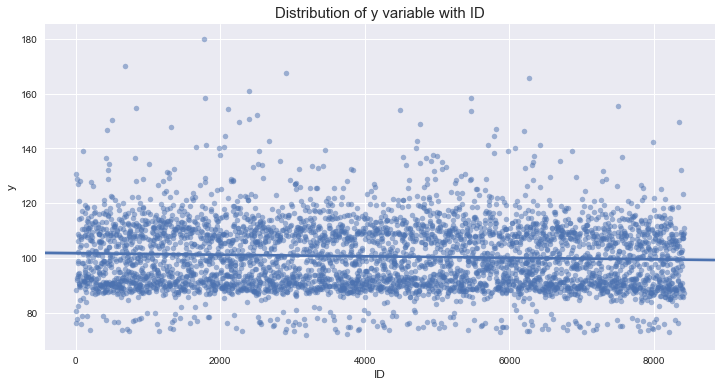

In [20]:
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=train_df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

ID変数に関しては若干の減少傾向があるようです。 ここでtrainとtestの間にIDがどのように分布しているかを見てみましょう。

### 下記の下記のカーネルはtrainとtestのIdとのヴァイオリン図です。


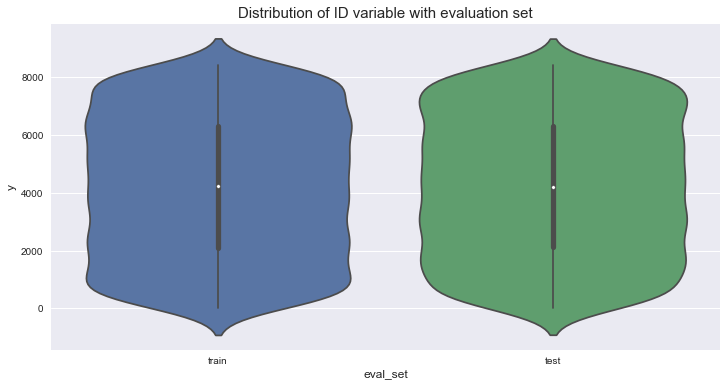

In [21]:
plt.figure(figsize=(6,10))
train_df['eval_set'] = "train"
test_df['eval_set'] = "test"
full_df = pd.concat([train_df[["ID","eval_set"]], test_df[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

trainとtestサンプルの間のID変数のランダムな分割のようです。

**重要な変数：**

今私たちはxgboostモデルを実行して重要な変数を取得しましょう。

### 下記のカーネルはxgboostで特徴量の重要度を評価している。

preprocessing.LabelEncoder(): 分類器にかける前に文字データを離散の数値に変換するときに使われる。細かい処理などはできないが、とりあいず離散数値にして分類器にかけたいときによく使います。
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html  
lbl.fit()で変換したいデータを選択します。  

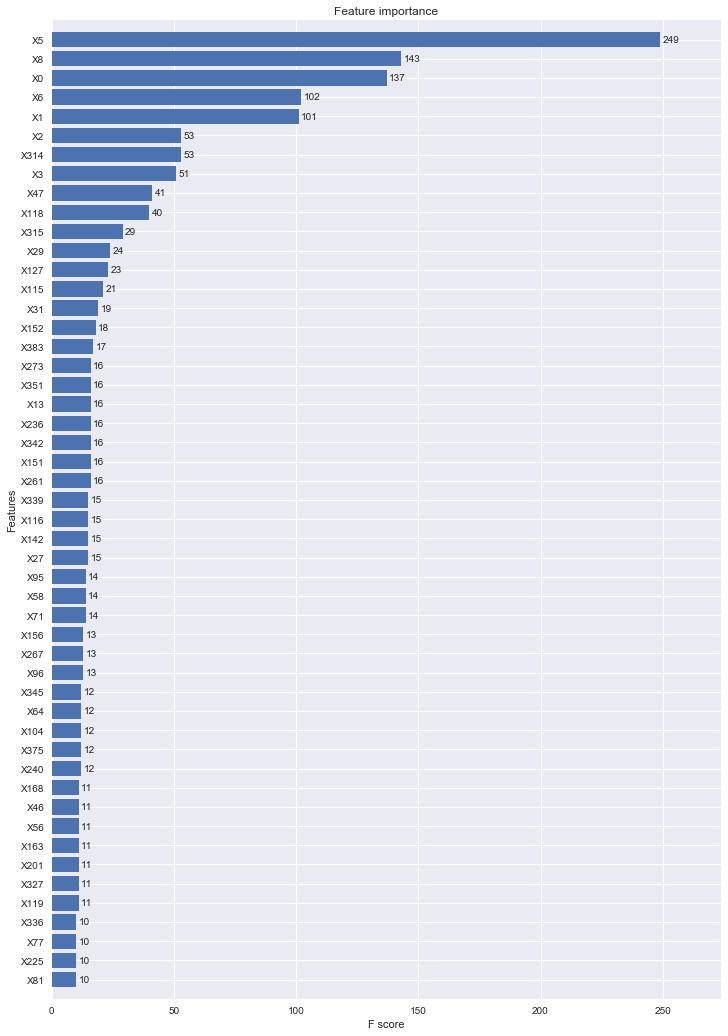

In [22]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df['y'].values
train_X = train_df.drop(["ID", "y", "eval_set"], axis=1)

# Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

カテゴリは、2進変数の後に続くトップスポットを占有します。

ランダムフォレストモデルを構築し、重要な変数を確認しましょう。

### 下記のカーネルは特徴量の重要度をランダムフォレストで評価している
ensemble:  
http://scikit-learn.org/stable/modules/ensemble.html  
RandomForestRegressor:  
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html  


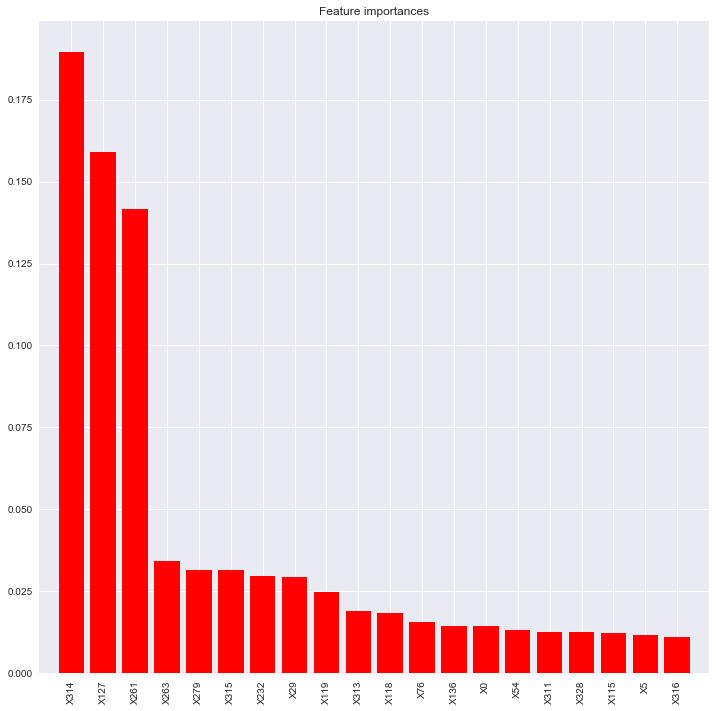

In [23]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

xgboostとランダムフォレストの間の重要な変数にはかなりの違いがあります。 なぜなのかはっきりわからない！

**More to come. Stay tuned.!**

**Please upvote if you like it.!**